In [1]:
#!/usr/bin/env python
%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import resource
import seaborn as sns
resource.setrlimit(resource.RLIMIT_NOFILE, (1000,-1)) #allow many plots
import os

import scipy.integrate as spi

from PyPDF2 import PdfFileMerger, PdfFileReader #for merging lots of pdfs

sns.set_style("ticks")


In [2]:
#upload data from Bryan

#VL data
vl = pd.read_csv('data/amp-vl-neut-all.csv')

#for PK data
pkpd = pd.read_csv('data/amp-pkpd-dat.csv')
pkpd = pkpd[pkpd['DVID']==1]
pkpd = pkpd.replace({'.':0})#.dropna()

#all other metrics
df = pd.read_csv('data/final_model_vl_summary.csv')

pkmodel = pd.read_csv('data/sim-pk-withVLneut.csv')
vlmodel = pd.read_csv('data/amp-individual-vrc01-sims.csv')

#summarydf = pd.read_csv('data/adata-time-summary.csv')

icchoice='ls'

In [3]:
#unique ID list
uids=list(pkpd['pub_id'].unique())
len(uids)

91

In [4]:
len(vlmodel['pub_id'].unique())

96

In [16]:
len(vlmodel[vlmodel['sim_type']=='NoTreatment']['pub_id'].unique())

96

In [19]:
#make all pkpd plots

simt=np.arange(100) #first 100 days
g=23 #always true

#loop over all
for pid in vlmodel['pub_id'].unique():
    
    vli = vl[vl['pub_id']==pid] #viral load data

    tdf1=df[df['pub_id']==pid] #other ppt data
    IC80 = np.round(tdf1['gmt80'+icchoice].iloc[0],2)
    fpday=tdf1['fp_day'].iloc[0]
    indlastneg0=vli[vli['days_fp']<0]['days_fp'].index.values[-1]

    #if in treatment group load the PKPD info, else set to zero blank
    if tdf1['trt_cat'].iloc[0]=='Placebo':
        pki=0
        mCi=0
        tt='P'
        print(tt)
        vlmodeli = vlmodel[(vlmodel['pub_id']==pid) & (vlmodel['sim_type']=='NoTreatment')] #output sim from Bryan
    else:
        if pid in uids:
            pki = pkpd[pkpd['pub_id']==pid]
            mCi = pkmodel[pkmodel['pub_id']==pid]
            tt='T'
            vlmodeli = vlmodel[(vlmodel['pub_id']==pid) & (vlmodel['sim_type']=='VRC01')] #output sim from Bryan
        else:
            print(tdf1['trt_cat'].iloc[0],pid,'weird')

    #colors
    cz1='coral'
    ss='R'
    if IC80<1:
        cz1='tab:blue'
        ss='S'
    cz2='gray'
    if tdf1['rx_code2'].iloc[0]=='T1':
        cz2='lightblue'
    if tdf1['rx_code2'].iloc[0]=='T2':
        cz2='tab:green'

    #plot PKPD and V relative to last neg

    fig,axs=plt.subplots(2,1,sharex=True,figsize=(4,5))
    if tdf1['trt_cat'].iloc[0]=='Placebo':
        axs[0].annotate('Placebo',[1,1])
    else:
        axs[0].semilogy(pki['TIME']-fpday,pki['DV'],marker='o',ls='',alpha=0.8,color=cz2)
        axs[0].plot(mCi['days_enrollment']-fpday,mCi['centr_conc'],marker='',ls='-',alpha=0.8,color=cz2,lw=3)
    axs[0].set_ylabel('VRC01 conc (µg/mL)')
    axs[0].set_ylim([0.1,1e3])
    axs[0].set_yticks([0.1,1,10,100,1e3])
    axs[0].set_title(pid+', IC80('+icchoice+')='+str(IC80)+'µg/mL',fontsize=10)
    axs[0].axvline(0,color='gray',ls='--')
    axs[0].set_xticks(np.linspace(-100,100,9))

    ax2 = axs[0].twinx()
    ax2.set_ylim(np.array([-1,3])-np.log10(IC80))
    ax2.set_ylabel('log10 Titer')
    ax2.grid('on')

    axs[0].set_xlim([-75,100])

    axs[1].plot(vli['days_fp'].loc[indlastneg0:],vli['log10VL'].loc[indlastneg0:],marker='',ls='--',alpha=0.5,color=cz1)
    axs[1].scatter(vli['days_fp'].loc[indlastneg0],vli['log10VL'].loc[indlastneg0],marker='s',facecolors='none',edgecolor='tab:red')
    axs[1].plot(vli['days_fp'].loc[indlastneg0+1:],vli['log10VL'].loc[indlastneg0+1:],marker='o',ls='',color=cz1)
    axs[1].plot(vlmodeli['days_fp'],vlmodeli['log10V'],color=cz1)
    axs[1].set_ylim([1,8])
    axs[1].set_ylabel('Viral load log10(copies/mL)')
    axs[1].set_xlabel('Time (days relative to first positive)')

    plt.tight_layout()
    plt.savefig('figures/allpkpdV/'+tt+ss+'_'+pid+'.pdf',dpi=600)
plt.close('all')

VRC01 (10mg/kg) 703-0322 weird


VRC01 (10mg/kg) 703-1687 weird
VRC01 (10mg/kg) 704-0925 weird
VRC01 (30mg/kg) 704-1168 weird
VRC01 (30mg/kg) 704-1969 weird


/Applications/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


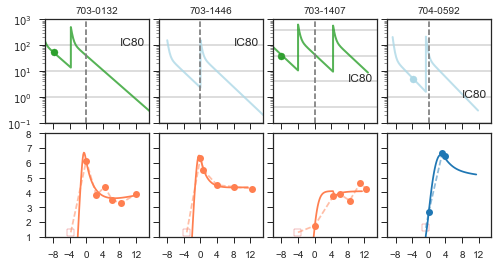

In [6]:
#4 PKPDV examples

pidz=['703-0132','703-1446','703-1407','704-0592']

fig,axs=plt.subplots(2,4,sharex=True,sharey='row',figsize=(8,4))

for ip,pid in enumerate(pidz):
    vli = vl[vl['pub_id']==pid]
    tdf1=df[df['pub_id']==pid]
    pki = pkpd[pkpd['pub_id']==pid]
    mCi = pkmodel[pkmodel['pub_id']==pid]

    indlastneg0=vli[vli['days_fp']<0]['days_fp'].index.values[-1]
    fpday=vli['fp_day'].iloc[0]
    IC80 = np.round(tdf1['gmt80'+icchoice].iloc[0],2)
    vlmodeli = vlmodel[(vlmodel['pub_id']==pid) & (vlmodel['sim_type']=='VRC01')] #output sim from Bryan
    
    cz1='coral'
    if IC80<1:
        cz1='tab:blue'
    cz2='gray'
    if vli['rx_code2'].iloc[0]=='T1':
        cz2='lightblue'
    if vli['rx_code2'].iloc[0]=='T2':
        cz2='tab:green'

    #plot PKPD and V relative to last neg

    ax=axs[0][ip]
    
    #instead, just loop and add lines for ID80
    for ix in [-3,-2,-1,0,1,2,3]:
        yy=IC80*10**ix
        ax.axhline(yy,color='gray',alpha=0.3)
    ax.annotate('IC80',[8,IC80])

    ax.semilogy((mCi['days_enrollment']-fpday)/7,mCi['centr_conc'],marker='',ls='-',alpha=0.8,color=cz2,lw=2)
    ax.scatter((pki['TIME'].values-fpday)/7,pki['DV'].astype(float).values,s=50,marker='o',c=cz2)#edgecolors=cz2,facecolors='none',alpha=0.8)
    ax.set_ylim([0.1,1e3])
    ax.set_yticks([0.1,1,10,100,1e3])
    ax.set_title(pid,fontsize=10)
    ax.axvline(0,color='gray',ls='--')
    ax.set_xticks(np.arange(-12,16,4))
    ax.set_xlim([-10,15])
        
    #plot viral loads
    ax=axs[1][ip]
    ax.plot(vli['days_fp'].loc[indlastneg0:]/7,vli['log10VL'].loc[indlastneg0:],marker='',ls='--',alpha=0.5,color=cz1)
    ax.scatter(vli['days_fp'].loc[indlastneg0]/7,vli['log10VL'].loc[indlastneg0],marker='s',facecolors='none',edgecolor='tab:red')
    ax.plot(vli['days_fp'].loc[indlastneg0+1:]/7,vli['log10VL'].loc[indlastneg0+1:],marker='o',ls='',color=cz1)
    ax.plot(vlmodeli['days_fp']/7.,vlmodeli['log10V'],color=cz1)
    ax.set_yticks(np.arange(0,10))
    ax.set_ylim([1,8])

plt.subplots_adjust(hspace = 0.1, wspace=0.1)
plt.savefig('figures/examplePKPDV4.pdf',dpi=600)


In [7]:
#merge this into 1 giant pdf

fns = os.listdir('figures/allpkpdV/')
fns.remove('.DS_Store')
fns.sort()

# Call the PdfFileMerger
mergedObject = PdfFileMerger()

# I had 116 files in the folder that had to be merged into a single document
# Loop through all of them and append their pages
for fn in fns:
    mergedObject.append(PdfFileReader('figures/allpkpdV/'+fn, 'rb'))

# Write all the files into a file which is named as shown below
mergedObject.write('figures/allpkpd-MERGED.pdf')


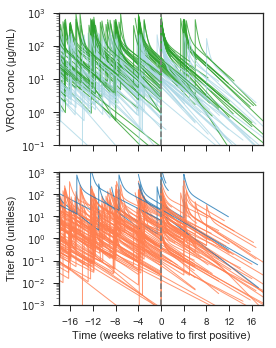

In [8]:
#put all PKPD plots on the same axis

simt=np.arange(100) #first 100 days
g=23 #always true

fig,axs=plt.subplots(2,1,sharex=True,figsize=(4,5))
for pid in uids:

    vli = vl[vl['pub_id']==pid]
    pki = pkpd[pkpd['pub_id']==pid]
    mCi = pkmodel[pkmodel['pub_id']==pid]

    IC80 = np.round(df[df['pub_id']==pid]['gmt80'+icchoice].iloc[0],2)
    
    cz1='coral'
    if IC80<1:
        cz1='tab:blue'

    fpday=vli['fp_day'].iloc[0]

    cz2='gray'
    if vli['rx_code2'].iloc[0]=='T1':
        cz2='lightblue'
    if vli['rx_code2'].iloc[0]=='T2':
        cz2='tab:green'

    #plot PKPD and V relative to last neg
    indlastneg0=vli[vli['days_fp']<0]['days_fp'].index.values[-1]

    axs[0].semilogy((mCi['days_enrollment']-fpday)/7,mCi['centr_conc'],marker='',ls='-',alpha=0.8,color=cz2,lw=1)

    axs[1].semilogy((mCi['days_enrollment']-fpday)/7,mCi['centr_conc']/IC80,marker='',ls='-',alpha=0.8,color=cz1,lw=1)

axs[0].set_ylabel('VRC01 conc (µg/mL)')
axs[0].set_ylim([0.1,1e3])
axs[0].set_yticks([0.1,1,10,100,1e3])
axs[0].axvline(0,color='gray',ls='--')
axs[0].set_xticks(np.arange(-16,17,4))
axs[0].set_xlim([-18,18])

axs[1].axvline(0,color='gray',ls='--')
axs[1].set_ylabel('Titer 80 (unitless)')
axs[1].set_ylim([1e-3,1000])
axs[1].set_xlabel('Time (weeks relative to first positive)')

plt.tight_layout()
plt.savefig('figures/PKPD.pdf',dpi=600)


NameError: name 'param_df' is not defined

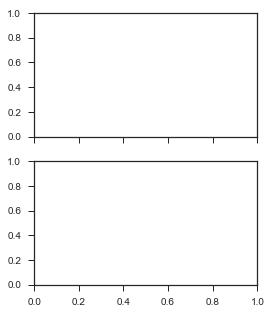

In [9]:
#plot all the modeled viral loads on top of eachother that had titer > 10

Tthresh=10

fig,axs=plt.subplots(2,1,sharex=True,figsize=(4,5))
for pid in uids:
#for pid in ['703-2141']:
    vli = vl[vl['pub_id']==pid]
    pki = pkpd[pkpd['pub_id']==pid]
    mCi = pkmodel[pkmodel['pub_id']==pid]

    IC80 = np.round(df[df['pub_id']==pid]['gmt80'+icchoice].iloc[0],2)
    
    cz1='coral'
    if IC80<1:
        cz1='tab:blue'

    fpday=vli['fp_day'].iloc[0]

    ## VL Model
    tdf = param_df[param_df['pub_id']==pid]
    #pzl=list(param_df.filter(like='_mode', axis=1).columns)
    initT,aS,dS,lBt0,lp,dI,n,V0,lrho=tdf[pzl].values[0]  #get MLE parameters
    Bt0=10**lBt0; p=10**lp     #unlog convert
    sol=spi.odeint(ode_sim, [aS/dS,V0/p*g,V0], simt, (aS,dS,Bt0,dI,n,p,g), rtol=1e-12) 
    simV=np.log10(sol[:,2]*1e3) #viral load as usual units copies/mL

    cz2='gray'
    if vli['rx_code2'].iloc[0]=='T1':
        cz2='lightblue'
    if vli['rx_code2'].iloc[0]=='T2':
        cz2='tab:green'

    #plot PKPD and V relative to last neg
    indlastneg0=vli[vli['days_fp']<0]['days_fp'].index.values[-1]

    fpT = mCi['centr_conc'].iloc[np.where((mCi['days_enrollment']-fpday)>0)[0][0]]/IC80 #titer 80 at first positive
    
    if fpT>Tthresh:
        
        axs[0].semilogy((mCi['days_enrollment']-fpday)/7,mCi['centr_conc']/IC80,marker='',ls='-',alpha=0.8,color=cz1,lw=1)
        axs[1].plot((simt-initT)/7,simV,color=cz1,lw=1,alpha=0.8)

axs[0].axvline(0,color='gray',ls='--')
axs[0].set_ylabel('Titer 80 (unitless)')
axs[0].set_ylim([1e-3,1000])
axs[0].set_xticks(np.arange(-16,17,4))
axs[0].set_xlim([-8,12])

axs[1].axvline(0,color='gray',ls='--')
axs[1].set_ylim([1,8])
axs[1].set_ylabel('Viral load log10(copies/mL)')
axs[1].set_xlabel('Time (weeks relative to first positive)')

plt.tight_layout()
plt.savefig('figures/VLtiter>'+str(Tthresh)+'.pdf',dpi=600)


In [10]:
#add columns to df for easy plotting of metrics
cl=[]; ml=[]; 

for i in range(len(df)):
    tdf = df.iloc[i]
    if tdf['trt_cat']=='Placebo':
        ml.append('s')
        if tdf['gmt80ls']>1:
            cl.append('coral')
        else:
            cl.append('tab:blue')
    
    if tdf['trt_cat']!='Placebo':
        ml.append('o')
        if tdf['gmt80ls']>1:
            cl.append('tab:red')
        else:
            cl.append('navy')

df['color']=cl
df['marker']=ml


model_log10peak
model_setpt
geo_auc_3mo


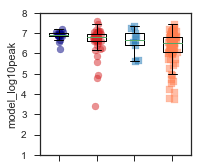

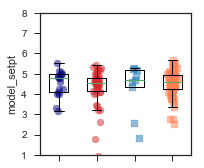

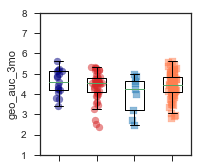

In [13]:
#viral load model metrics

#now plot        
jit=0.05
al=0.5

cz=['navy','tab:red','tab:blue','coral',]
mz=['o','o','s','s']

varz = ['model_log10peak', 'model_setpt', 'geo_auc_3mo']
for v in varz:

    dfPS=df[(df['trt_cat']=='Placebo')& (df['gmt80ls']<1)][v].dropna()
    dfPR=df[(df['trt_cat']=='Placebo')& (df['gmt80ls']>1)][v].dropna()

    dfTS=df[(df['trt_cat']!='Placebo')& (df['gmt80ls']<1)][v].dropna()
    dfTR=df[(df['trt_cat']!='Placebo')& (df['gmt80ls']>1)][v].dropna()

    print(v)

    plt.figure(figsize=(3,2.5))
    it=0
    for it,tdf in enumerate([dfPS,dfPR,dfTS,dfTR]):
        plt.scatter(np.random.normal(it+1,jit,len(tdf)),tdf,c=cz[it],alpha=al,marker=mz[it])

    plt.boxplot([dfPS,dfPR,dfTS,dfTR],widths=0.5,vert=True)
    plt.ylabel(v)
    plt.ylim([1,8])
    plt.yticks(np.arange(1,9))
    
    plt.xticks([1,2,3,4],[])
    
    plt.tight_layout()
    plt.savefig('figures/modelmetrics_'+v+'.pdf',dpi=600)


In [ ]:
#now box plots on metrics

#stratify all metrics by treatment and IC80

#now plot        
jit=0.05
al=0.5

varz = ['model_log10peak', 'model_peak_day', 'model_setpt',
       'geo_auc_3mo', 'max_upslope', 'initT_mode', 'unadjusted_r0', 'upslope_r0']

cz=['navy','tab:red','tab:blue','coral',]
mz=['o','o','s','s']

for v in varz:

    dfPS=df[(df['trt_cat']=='Placebo')& (df['gmt80ls']<1)][v].dropna()
    dfPR=df[(df['trt_cat']=='Placebo')& (df['gmt80ls']>1)][v].dropna()

    dfTS=df[(df['trt_cat']!='Placebo')& (df['gmt80ls']<1)][v].dropna()
    dfTR=df[(df['trt_cat']!='Placebo')& (df['gmt80ls']>1)][v].dropna()

    print(v)
    #print('significant should be <',0.05/6)
    #print('PS','PR',st.mannwhitneyu(dfPS,dfPR))
    #print('PS','TS',st.mannwhitneyu(dfPS,dfTS))
    #print('PS','TR',st.mannwhitneyu(dfPS,dfTR))
    #print('PR','TS',st.mannwhitneyu(dfPR,dfTS))
    #print('PR','TR',st.mannwhitneyu(dfPR,dfTR))
    #print('TS','TR',st.mannwhitneyu(dfTS,dfTR))

    plt.figure(figsize=(3,2.5))
    it=0
    for it,tdf in enumerate([dfPS,dfPR,dfTS,dfTR]):
        plt.scatter(np.random.normal(it+1,jit,len(tdf)),tdf,c=cz[it],alpha=al,marker=mz[it])

    plt.boxplot([dfPS,dfPR,dfTS,dfTR],widths=0.5,vert=True)
    plt.ylabel(v)
    
    plt.xticks([1,2,3,4],[])
    
    plt.tight_layout()
    plt.savefig('figures/modelmetrics_'+v+'.pdf',dpi=600)


In [ ]:
#now box plots on metrics

#stratify all metrics by treatment and IC80

#now plot        
jit=0.05
al=0.5

varz = ['model_log10peak', 'model_peak_day', 'model_setpt',
       'geo_auc_3mo', 'max_upslope', 'initT_mode', 'unadjusted_r0', 'upslope_r0']

cz=['navy','tab:red','tab:blue','coral',]
mz=['o','o','s','s']

print('significant should be <',0.05/6)
for v in varz:

    dfPS=df[(df['trt_cat']=='Placebo')& (df['gmt80ls']<1)][v].dropna()
    dfPR=df[(df['trt_cat']=='Placebo')& (df['gmt80ls']>1)][v].dropna()

    dfTS=df[(df['trt_cat']!='Placebo')& (df['gmt80ls']<1)][v].dropna()
    dfTR=df[(df['trt_cat']!='Placebo')& (df['gmt80ls']>1)][v].dropna()

    print(v)
    print('PS','PR',st.mannwhitneyu(dfPS,dfPR))
    print('PS','TS',st.mannwhitneyu(dfPS,dfTS))
    print('PS','TR',st.mannwhitneyu(dfPS,dfTR))
    print('PR','TS',st.mannwhitneyu(dfPR,dfTS))
    print('PR','TR',st.mannwhitneyu(dfPR,dfTR))
    print('TS','TR',st.mannwhitneyu(dfTS,dfTR))

